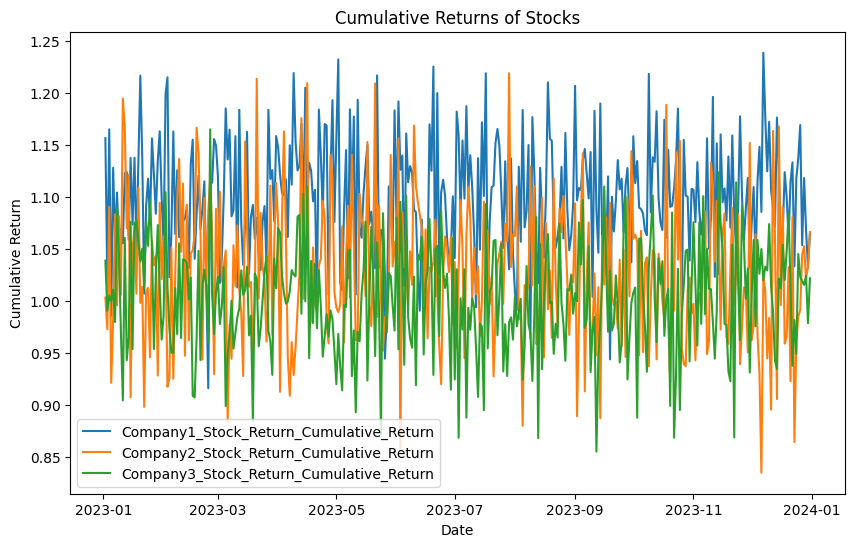

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and preprocess data
# Load synthetic data
num_days = 365
dates = pd.date_range(start='2023-01-01', periods=num_days, freq='D')

stocks_data = {
    'Date': dates,
    'Company1_Stock': np.random.normal(100, 5, num_days),
    'Company2_Stock': np.random.normal(120, 8, num_days),
    'Company3_Stock': np.random.normal(80, 4, num_days),
}

# Create a DataFrame
stocks_df = pd.DataFrame(stocks_data)

# Step 2: Calculate performance metrics
# Calculate daily returns
for col in stocks_df.columns[1:4]:  # This will loop through 'Company1_Stock', 'Company2_Stock', and 'Company3_Stock'
    stocks_df[f'{col}_Return'] = stocks_df[col].pct_change()

# Calculate cumulative returns
for col in stocks_df.columns[4:7]:  # This will loop through 'Company1_Stock_Return', 'Company2_Stock_Return', and 'Company3_Stock_Return'
    stocks_df[f'{col}_Cumulative_Return'] = (1 + stocks_df[col]).cumprod()


# Step 3: Select key performance indicators (KPIs)

# Step 4: Visualize performance metrics

# Plot cumulative returns using line plots
plt.figure(figsize=(10, 6))
for col in stocks_df.columns[7:]:
    plt.plot(stocks_df['Date'], stocks_df[col], label=col)

plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Returns of Stocks')
plt.legend()
plt.show()

# Step 5: Interpret and make decisions
# Analyze the visualized data and make decisions about the portfolio




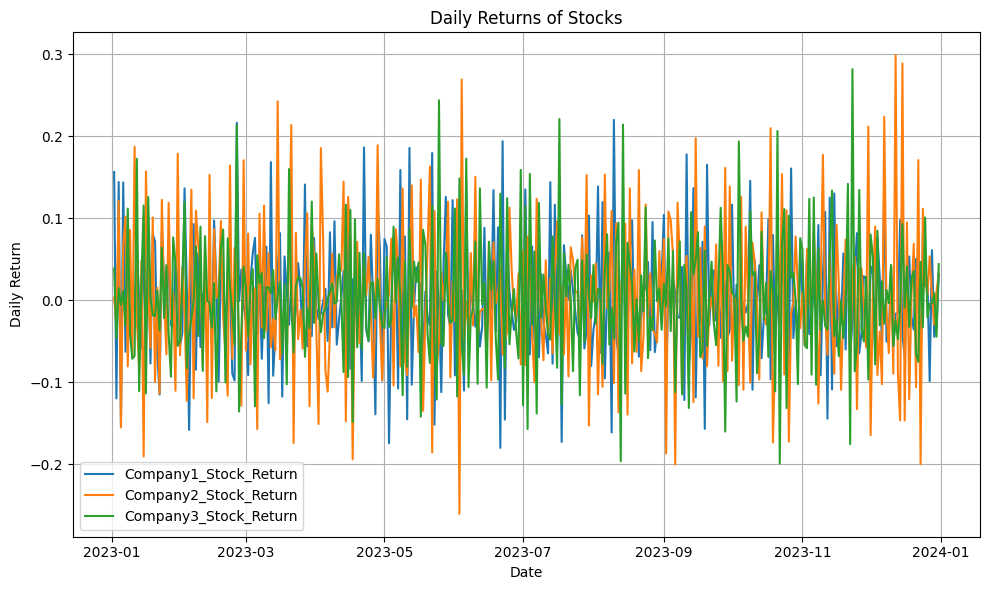

In [ ]:
# Plot daily returns using line plots
plt.figure(figsize=(10, 6))
for col in stocks_df.columns[4:7]:  # Looping through 'Company1_Stock_Return', 'Company2_Stock_Return', and 'Company3_Stock_Return'
    plt.plot(stocks_df['Date'], stocks_df[col], label=col)

plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Daily Returns of Stocks')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Assuming equal weights for simplicity
weights = [1/3, 1/3, 1/3]

# Calculate portfolio daily returns
stocks_df['Portfolio_Return'] = stocks_df[['Company1_Stock_Return', 'Company2_Stock_Return', 'Company3_Stock_Return']].mul(weights, axis=1).sum(axis=1)

# Calculate portfolio volatility (standard deviation of portfolio returns)
portfolio_volatility = stocks_df['Portfolio_Return'].std()
print(" portfolio_volatility" , portfolio_volatility)

# Assuming a risk-free rate of 1%
risk_free_rate = 0.01

# Calculate Sharpe Ratio
sharpe_ratio = (stocks_df['Portfolio_Return'].mean() - risk_free_rate) / portfolio_volatility

print(" sharpe_ratio" , sharpe_ratio)

print(" stocks_df" , stocks_df.head())


 portfolio_volatility 0.04685542811920242
 sharpe_ratio -0.13951405627304383
 stocks_df         Date  Company1_Stock  Company2_Stock  Company3_Stock  \
0 2023-01-01       90.779186      117.345879       80.009961   
1 2023-01-02      104.977492      117.734010       83.108115   
2 2023-01-03       92.407181      114.140558       79.260237   
3 2023-01-04      105.745623      127.976263       80.434924   
4 2023-01-05       89.517296      108.126560       79.995366   

   Company1_Stock_Return  Company2_Stock_Return  Company3_Stock_Return  \
0                    NaN                    NaN                    NaN   
1               0.156405               0.003308               0.038722   
2              -0.119743              -0.030522              -0.046300   
3               0.144344               0.121216               0.014821   
4              -0.153466              -0.155105              -0.005465   

   Company1_Stock_Return_Cumulative_Return  \
0                                   

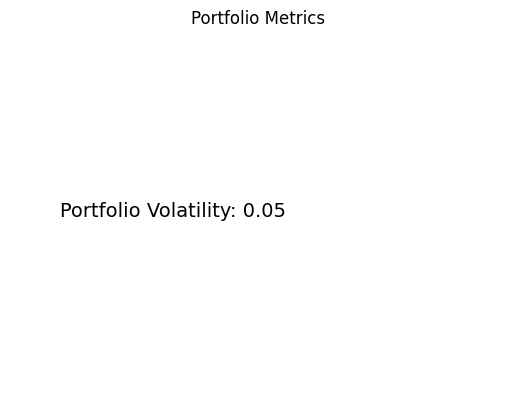

In [ ]:
# Display Portfolio Volatility
plt.text(0.1, 0.5, f'Portfolio Volatility: {portfolio_volatility:.2f}', fontsize=14)

plt.axis('off')
plt.title("Portfolio Metrics")
plt.show()


In [ ]:


# Visualize Sharpe Ratio and Portfolio Volatility
plt.figure(figsize=(10, 6))

# Display Sharpe Ratio
plt.text(0.1, 0.6, f'Sharpe Ratio: {sharpe_ratio:.2f}', fontsize=14)